In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
# Generate sample dataset
X, y = make_regression(n_samples=500, n_features=1, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
class GradientBoosting:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []

    def fit(self, X, y):
        # Step 1: Initialize with mean prediction
        y_pred = np.full(y.shape, np.mean(y))
        self.initial_prediction = np.mean(y)

        for _ in range(self.n_estimators):
            # Step 2: Compute residuals (negative gradients)
            residuals = y - y_pred
            
            # Step 3: Train a weak learner (Decision Stump)
            model = DecisionTreeRegressor(max_depth=self.max_depth)
            model.fit(X, residuals)
            self.models.append(model)
            
            # Step 4: Update predictions
            y_pred += self.learning_rate * model.predict(X)

    def predict(self, X):
        # Start with the initial prediction
        y_pred = np.full((X.shape[0],), self.initial_prediction)
        
        # Add contributions from all weak learners
        for model in self.models:
            y_pred += self.learning_rate * model.predict(X)
        
        return y_pred

In [9]:
# Train Gradient Boosting model
gb = GradientBoosting(n_estimators=100, learning_rate=0.1, max_depth=1)
gb.fit(X_train, y_train)

In [11]:
# Make Predictions
y_pred = gb.predict(X_test)

In [13]:
# Evaluate
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 103.12793018504144


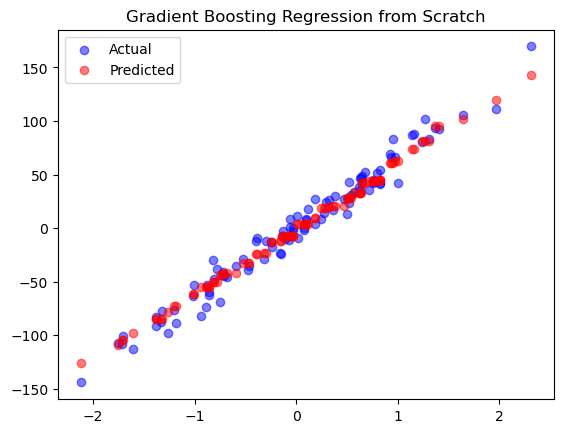

In [15]:
# Plot results
plt.scatter(X_test, y_test, label="Actual", color="blue", alpha=0.5)
plt.scatter(X_test, y_pred, label="Predicted", color="red", alpha=0.5)
plt.legend()
plt.title("Gradient Boosting Regression from Scratch")
plt.show()